In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, median_absolute_error,r2_score

 Leer el conjunto de datos desde el archivo Excel

In [86]:
df = pd.read_excel('2SecondAttempt.xlsx')
df = df.drop(['id','Precipitacion','Temp_Air_Min'],axis=1)
# Obtener el número de filas
num_filas = df.shape[0]
print(f'Número de instancias: {num_filas}')
# Obtener el número de column#as
num_columnas = df.shape[1]
print(f'Número de propiedades: {num_columnas}')

# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)
# Obtener estadísticas resumidas de las propiedades numéricas
resumen_estadisticas = df.describe()
print('Estadísticas resumidas:\n', resumen_estadisticas)


Número de instancias: 852
Número de propiedades: 14
Nombres de propiedades: Index(['edad', 'E1', 'E2', 'E3', 'E4', 'E5', 'grade_monilla', 'qq',
       'Evapotranspiration_Crop', 'Nvdi', 'Relat_Hum_Max_Temp', 'Temp_Air_Max',
       'Dew_Temp_Max', 'Sunshine_Duration'],
      dtype='object')
Estadísticas resumidas:
              edad          E1          E2          E3          E4          E5  \
count  852.000000  852.000000  852.000000  852.000000  852.000000  852.000000   
mean    10.718310   11.973005    7.573944    5.768779    4.353286    2.435446   
std      2.210007   29.019431   21.684370   20.440204   18.568344   13.456002   
min      2.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     11.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%     12.000000   12.250000    0.000000    0.000000    0.000000    0.000000   
max     13.000000  325.000000  216.0

 Visualizar relaciones entre las variables mediante un pairplot

Convirtiendo en variables categoricas el mes y año

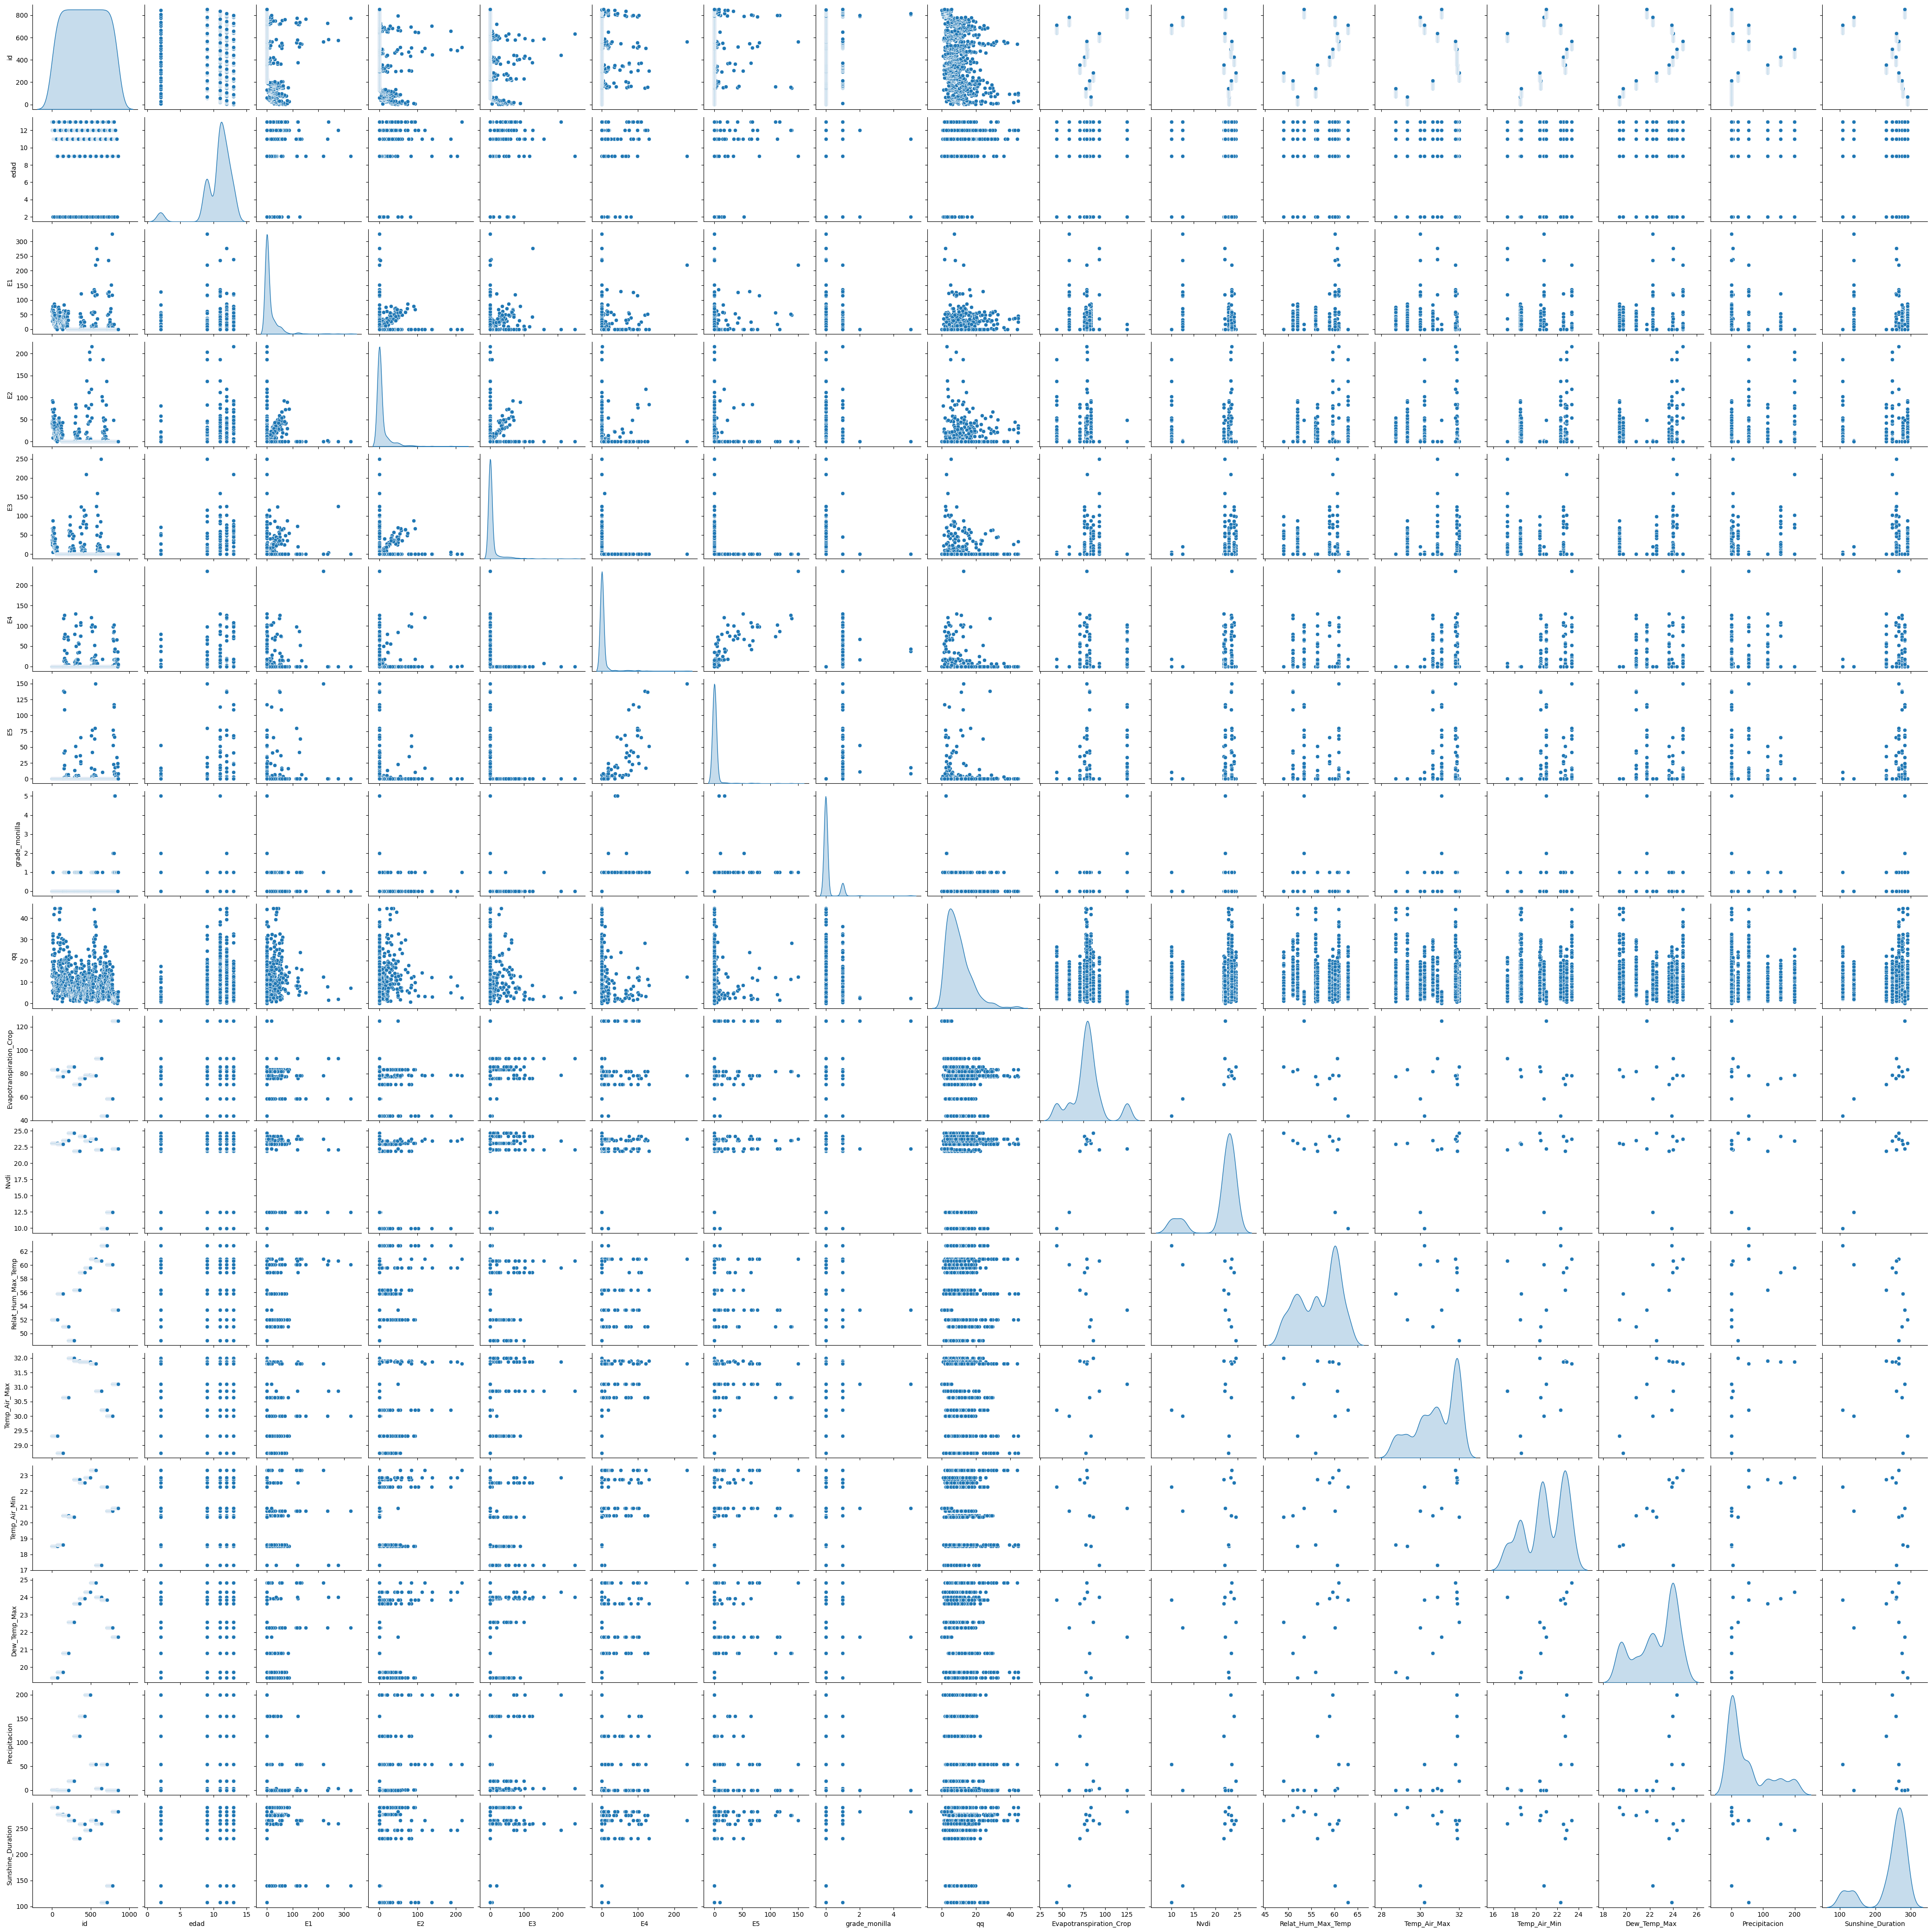

In [5]:
sns.pairplot(df, diag_kind='kde')
plt.show()

matriz de correlación para cuantificar la relación lineal entre las variables:

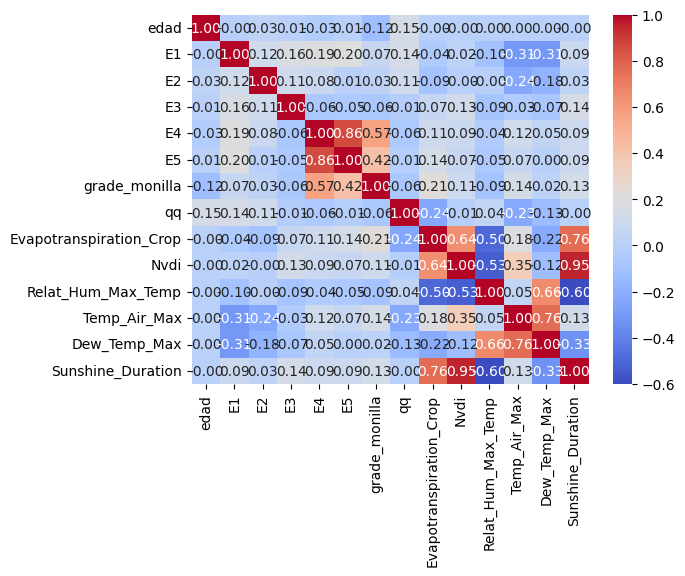

In [87]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Aplicando  SVM y egresion lineal simple en un enfoque de regresion lineal

In [88]:
X = df.drop(['qq'], axis=1)
y = df['qq']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Crear un DataFrame para almacenar las métricas

# SVM Regresión
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_explained_variance = explained_variance_score(y_test, svm_predictions)
svm_medae = median_absolute_error(y_test, svm_predictions)

# Regresión Lineal Simple
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_explained_variance = explained_variance_score(y_test, linear_predictions)
linear_medae = median_absolute_error(y_test, linear_predictions)

print("Métricas de SVM Regresión:")
print("Mean Squared Error (MSE):", svm_mse)
print("R2 Score:", svm_r2)
print("Mean Absolute Error (MAE):", svm_mae)
print("Root Mean Squared Error (RMSE):", svm_rmse)
print("Explained Variance Score:", svm_explained_variance)
print("Median Absolute Error (MedAE):", svm_medae)
print("\n")

print("Métricas de Regresión Lineal Simple:")
print("Mean Squared Error (MSE):", linear_mse)
print("R2 Score:", linear_r2)
print("Mean Absolute Error (MAE):", linear_mae)
print("Root Mean Squared Error (RMSE):", linear_rmse)
print("Explained Variance Score:", linear_explained_variance)
print("Median Absolute Error (MedAE):", linear_medae)



Métricas de SVM Regresión:
Mean Squared Error (MSE): 56.22356923828804
R2 Score: 0.15078993793053852
Mean Absolute Error (MAE): 4.8627413213386
Root Mean Squared Error (RMSE): 7.498237742182361
Explained Variance Score: 0.20072907098256032
Median Absolute Error (MedAE): 3.4924671923257575


Métricas de Regresión Lineal Simple:
Mean Squared Error (MSE): 55.17416642303036
R2 Score: 0.16664029111789824
Mean Absolute Error (MAE): 5.251467920070519
Root Mean Squared Error (RMSE): 7.427931503657688
Explained Variance Score: 0.17003885004011776
Median Absolute Error (MedAE): 4.062327235541543


Graficos de la prediccion

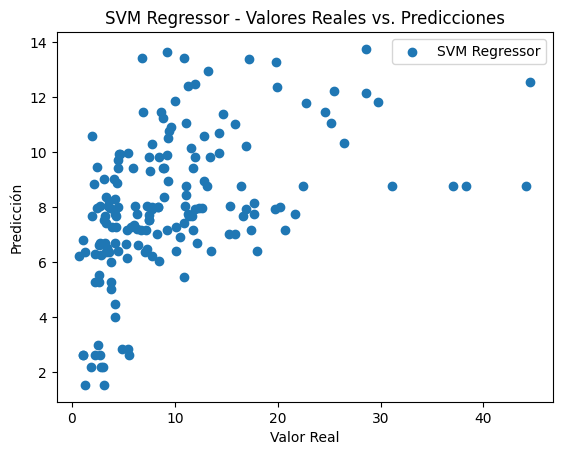

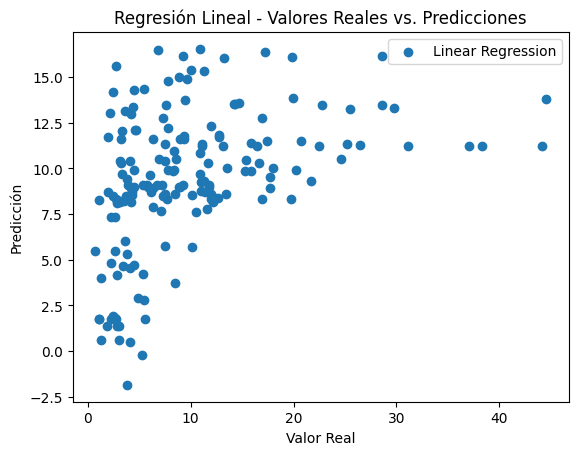

In [89]:
# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('SVM Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión Lineal - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Regresion no lineal
Random Forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)
# Calcular métricas para Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_explained_variance = explained_variance_score(y_test, rf_predictions)
rf_medae = median_absolute_error(y_test, rf_predictions)

# Imprimir las métricas
print("Métricas de Random Forest Regressor:")
print("Mean Squared Error (MSE):", rf_mse)
print("R2 Score:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Explained Variance Score:", rf_explained_variance)
print("Median Absolute Error (MedAE):", rf_medae)


Métricas de Random Forest Regressor:
Mean Squared Error (MSE): 42.589399248026695
R2 Score: 0.35672268998731593
Mean Absolute Error (MAE): 4.824442565584627
Root Mean Squared Error (RMSE): 6.526055412577087
Explained Variance Score: 0.35672472190487525
Median Absolute Error (MedAE): 3.6527657783917995


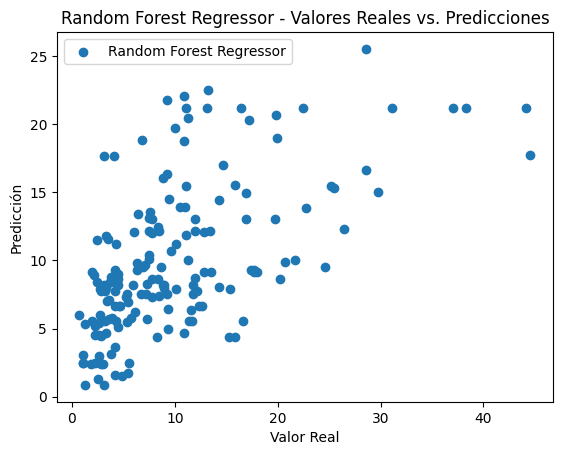

In [92]:
# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Random Forest Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Gradient Boosting

Métricas de Gradient Boosting Regressor:
Mean Squared Error (MSE): 42.970834330997576
R2 Score: 0.3509614315885057
Mean Absolute Error (MAE): 4.6609511633931815
Root Mean Squared Error (RMSE): 6.555214285665845
Explained Variance Score: 0.3510142228816272
Median Absolute Error (MedAE): 3.2516036074082115


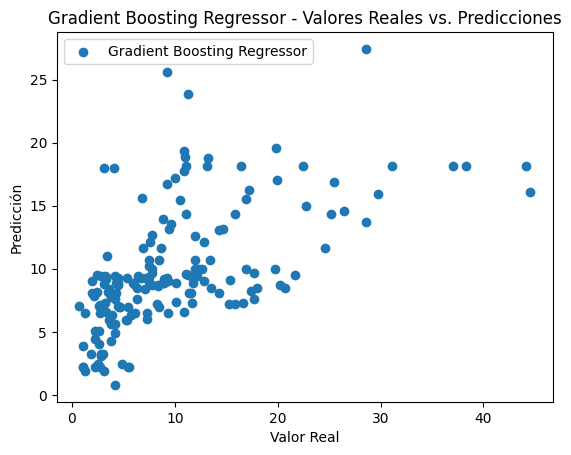

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Crear un modelo de Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
gb_predictions = gb_regressor.predict(X_test)
# Calcular métricas para Gradient Boosting Regressor
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)
gb_explained_variance = explained_variance_score(y_test, gb_predictions)
gb_medae = median_absolute_error(y_test, gb_predictions)

# Imprimir las métricas
print("Métricas de Gradient Boosting Regressor:")
print("Mean Squared Error (MSE):", gb_mse)
print("R2 Score:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("Explained Variance Score:", gb_explained_variance)
print("Median Absolute Error (MedAE):", gb_medae)

# Gráfico para Gradient Boosting Regressor
plt.scatter(y_test, gb_predictions, label='Gradient Boosting Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gradient Boosting Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


RNN

Epoch 1/50
17/17 [==============================] - 1s 15ms/step - loss: 140.3941 - val_loss: 115.5092
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 113.0215 - val_loss: 73.1295
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 77.0018 - val_loss: 58.5765
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 61.8097 - val_loss: 48.2895
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 57.3369 - val_loss: 47.7105
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 54.1516 - val_loss: 44.3319
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 53.4159 - val_loss: 42.5776
Epoch 8/50
17/17 [==============================] - 0s 4ms/step - loss: 51.0380 - val_loss: 41.1411
Epoch 9/50
17/17 [==============================] - 0s 4ms/step - loss: 51.2344 - val_loss: 39.7839
Epoch 10/50
17/17 [==============================] - 0s 4ms/step - loss: 47.2931 - val_loss: 38.

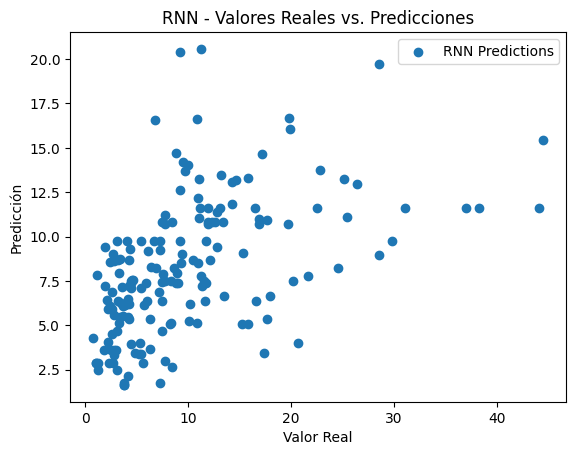

In [94]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una RNN

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Construir el modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape de los datos para que sean compatibles con la entrada de la RNN
X_train_rnn_reshaped = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn_reshaped = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))

# Entrenar el modelo
history = model.fit(X_train_rnn_reshaped, y_train_rnn, epochs=50, batch_size=32, validation_data=(X_val_rnn_reshaped, y_val_rnn))

# Realizar predicciones en el conjunto de prueba
X_test_rnn_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rnn_predictions = model.predict(X_test_rnn_reshaped)

rnn_predictions_flat = rnn_predictions.flatten()  # Definir rnn_predictions_flat

# Calcular métricas para RNN
rnn_mse = mean_squared_error(y_test, rnn_predictions_flat)
rnn_r2 = r2_score(y_test, rnn_predictions_flat)
rnn_mae = mean_absolute_error(y_test, rnn_predictions_flat)
rnn_rmse = mean_squared_error(y_test, rnn_predictions_flat, squared=False)
rnn_explained_variance = explained_variance_score(y_test, rnn_predictions_flat)
rnn_medae = median_absolute_error(y_test, rnn_predictions_flat)

# Imprimir las métricas
print("Métricas de Red Neuronal Recurrente (RNN):")
print("Mean Squared Error (MSE):", rnn_mse)
print("R2 Score:", rnn_r2)
print("Mean Absolute Error (MAE):", rnn_mae)
print("Root Mean Squared Error (RMSE):", rnn_rmse)
print("Explained Variance Score:", rnn_explained_variance)
print("Median Absolute Error (MedAE):", rnn_medae)

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RNN - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Epoch 1/50
17/17 [==============================] - 1s 17ms/step - loss: 144.9088 - val_loss: 124.5099
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 133.3260 - val_loss: 102.0394
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 140.4157 - val_loss: 111.2729
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 128.4498 - val_loss: 111.7135
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 126.0574 - val_loss: 106.5608
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 115.3435 - val_loss: 94.8518
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 108.5103 - val_loss: 87.6072
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 94.3208 - val_loss: 78.8682
Epoch 9/50
17/17 [==============================] - 0s 5ms/step - loss: 87.0300 - val_loss: 63.8038
Epoch 10/50
17/17 [==============================] - 0s 5ms/step - loss: 69.1713 - val_

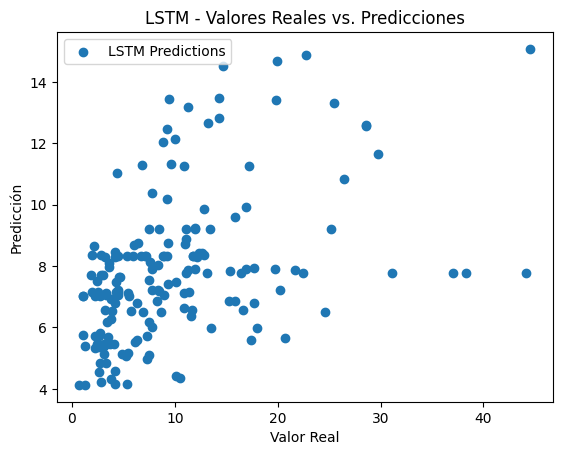

In [95]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una LSTM

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Reshape de los datos para que sean compatibles con la entrada de la LSTM
X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_val_lstm_reshaped = X_val_lstm.reshape((X_val_lstm.shape[0], X_val_lstm.shape[1], 1))

# Construir el modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_lstm_reshaped, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_val_lstm_reshaped, y_val_lstm))

# Realizar predicciones en el conjunto de prueba
X_test_lstm_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = model.predict(X_test_lstm_reshaped)

# Realizar predicciones en el conjunto de prueba
lstm_predictions_flat = lstm_predictions.flatten()  # Asegurar que las predicciones tengan la misma forma que y_test

# Calcular métricas para LSTM
lstm_mse = mean_squared_error(y_test, lstm_predictions_flat)
lstm_r2 = r2_score(y_test, lstm_predictions_flat)
lstm_mae = mean_absolute_error(y_test, lstm_predictions_flat)
lstm_rmse = mean_squared_error(y_test, lstm_predictions_flat, squared=False)
lstm_explained_variance = explained_variance_score(y_test, lstm_predictions_flat)
lstm_medae = median_absolute_error(y_test, lstm_predictions_flat)

# Imprimir las métricas
print("Métricas de Red Neuronal Recurrente de Memoria a Corto Plazo (LSTM):")
print("Mean Squared Error (MSE):", lstm_mse)
print("R2 Score:", lstm_r2)
print("Mean Absolute Error (MAE):", lstm_mae)
print("Root Mean Squared Error (RMSE):", lstm_rmse)
print("Explained Variance Score:", lstm_explained_variance)
print("Median Absolute Error (MedAE):", lstm_medae)

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('LSTM - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


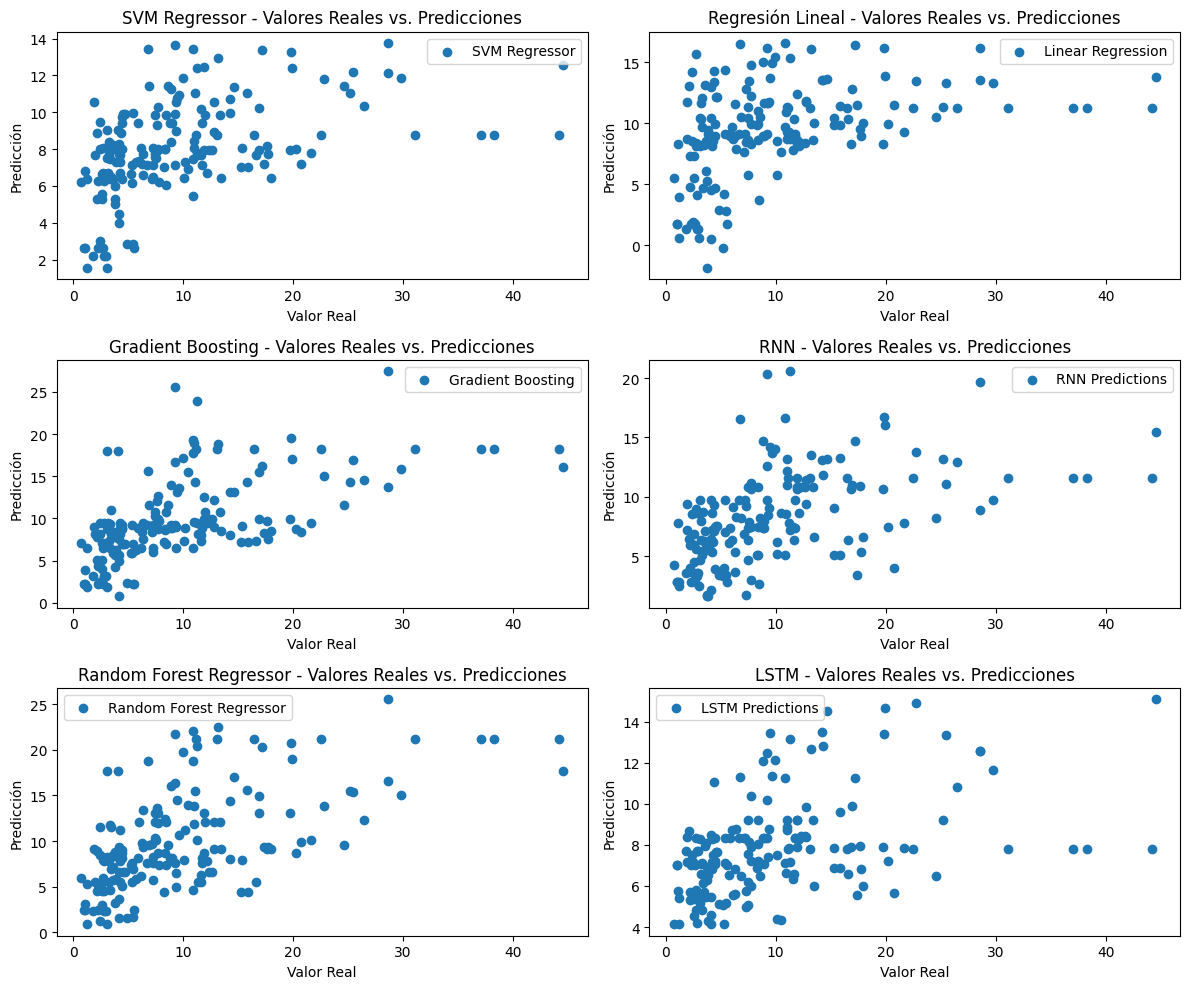

In [96]:
# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Gráfico para SVM Regressor
axes[0, 0].scatter(y_test, svm_predictions, label='SVM Regressor')
axes[0, 0].set_xlabel('Valor Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].set_title('SVM Regressor - Valores Reales vs. Predicciones')
axes[0, 0].legend()

# Gráfico para Regresión Lineal
axes[0, 1].scatter(y_test, linear_predictions, label='Linear Regression')
axes[0, 1].set_xlabel('Valor Real')
axes[0, 1].set_ylabel('Predicción')
axes[0, 1].set_title('Regresión Lineal - Valores Reales vs. Predicciones')
axes[0, 1].legend()

# Gráfico para Gradient Boosting
axes[1, 0].scatter(y_test, gb_predictions, label='Gradient Boosting')
axes[1, 0].set_xlabel('Valor Real')
axes[1, 0].set_ylabel('Predicción')
axes[1, 0].set_title('Gradient Boosting - Valores Reales vs. Predicciones')
axes[1, 0].legend()

# Gráfico para RNN
axes[1, 1].scatter(y_test, rnn_predictions, label='RNN Predictions')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Predicción')
axes[1, 1].set_title('RNN - Valores Reales vs. Predicciones')
axes[1, 1].legend()
# Gráfico para Random Forest Regressor
axes[2, 0].scatter(y_test, rf_predictions, label='Random Forest Regressor')
axes[2, 0].set_xlabel('Valor Real')
axes[2, 0].set_ylabel('Predicción')
axes[2, 0].set_title('Random Forest Regressor - Valores Reales vs. Predicciones')
axes[2, 0].legend()

# Gráfico para LSTM
axes[2, 1].scatter(y_test, lstm_predictions, label='LSTM Predictions')
axes[2, 1].set_xlabel('Valor Real')
axes[2, 1].set_ylabel('Predicción')
axes[2, 1].set_title('LSTM - Valores Reales vs. Predicciones')
axes[2, 1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

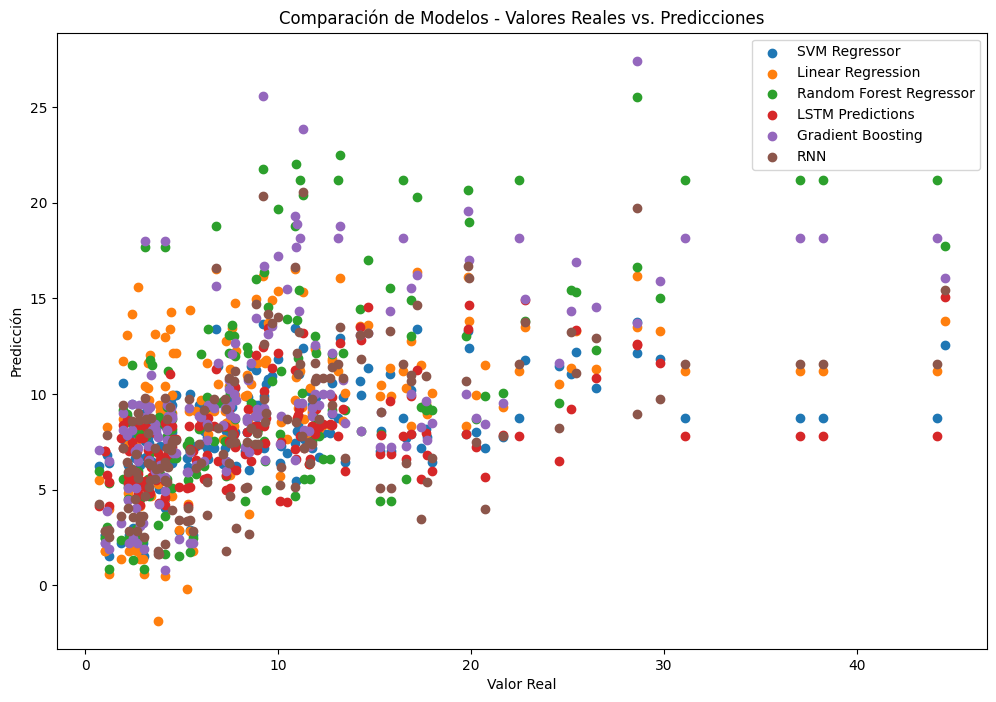

In [97]:
import matplotlib.pyplot as plt

# Crear un solo gráfico
plt.figure(figsize=(12, 8))

# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')

# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')

# Gráfico para Gradient Boosting
plt.scatter(y_test, gb_predictions, label='Gradient Boosting')

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN')
# Ajustar etiquetas y leyenda
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos - Valores Reales vs. Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()


# Comparación de métricas 

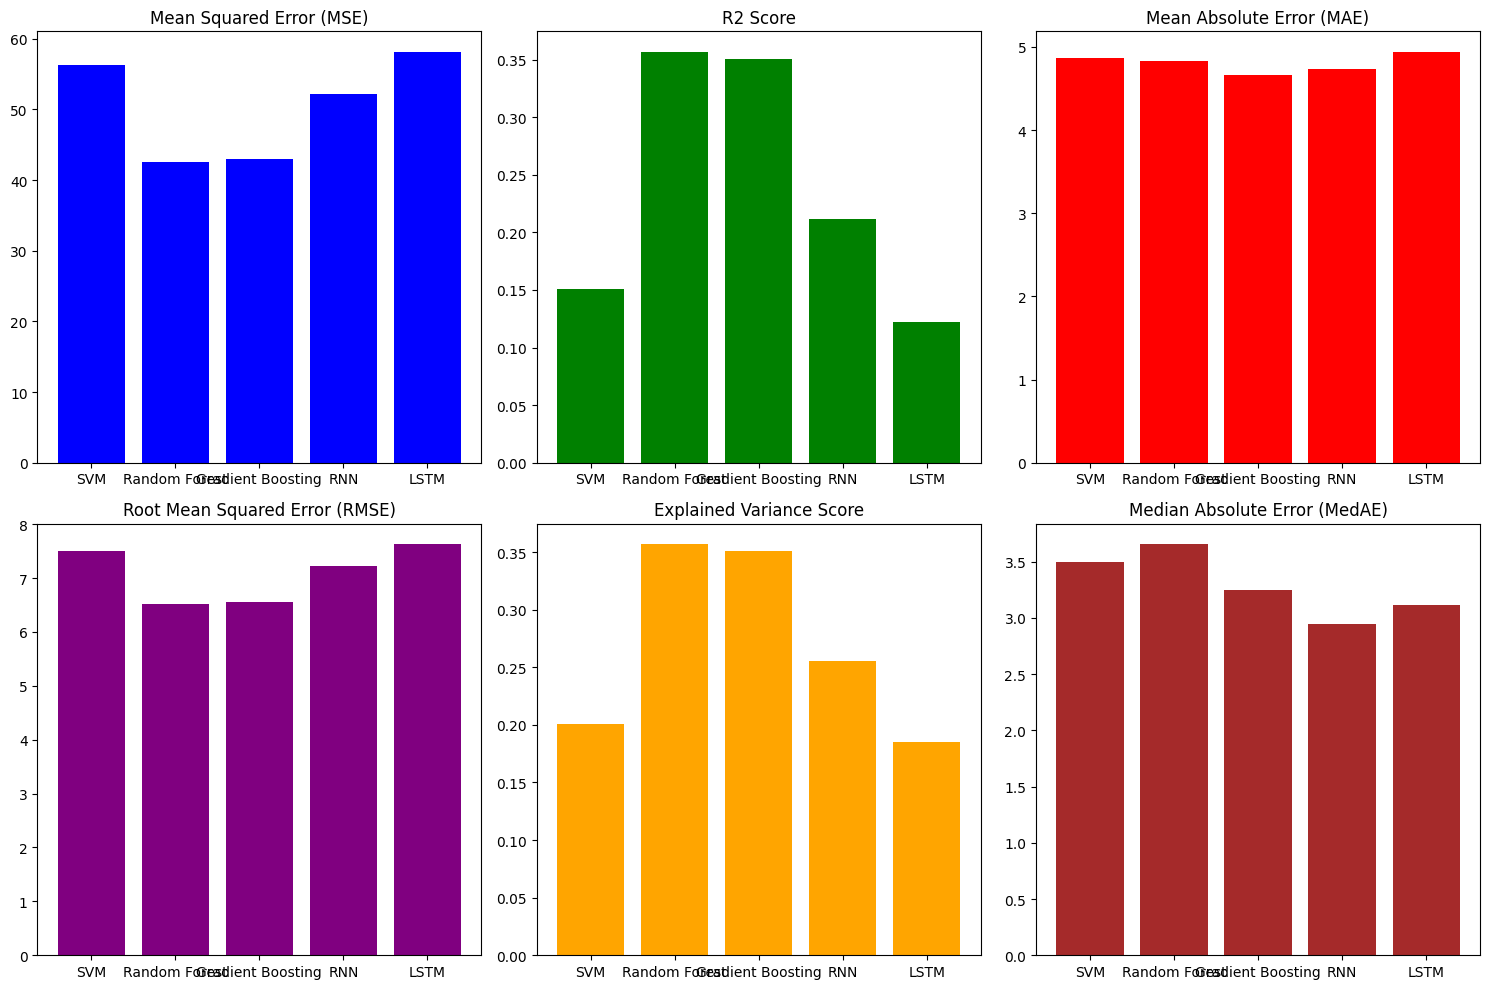

In [99]:
# Definir las métricas de cada modelo
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'RNN', 'LSTM']
mse_values = [svm_mse, rf_mse, gb_mse, rnn_mse, lstm_mse]
r2_values = [svm_r2, rf_r2, gb_r2, rnn_r2, lstm_r2]
mae_values = [svm_mae, rf_mae, gb_mae, rnn_mae, lstm_mae]
rmse_values = [svm_rmse, rf_rmse, gb_rmse, rnn_rmse, lstm_rmse]
explained_variance_values = [svm_explained_variance, rf_explained_variance, gb_explained_variance, rnn_explained_variance, lstm_explained_variance]
medae_values = [svm_medae, rf_medae, gb_medae, rnn_medae, lstm_medae]

# Crear subplots para cada métrica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# MSE
axes[0, 0].bar(model_names, mse_values, color='blue')
axes[0, 0].set_title('Mean Squared Error (MSE)')

# R2 Score
axes[0, 1].bar(model_names, r2_values, color='green')
axes[0, 1].set_title('R2 Score')

# MAE
axes[0, 2].bar(model_names, mae_values, color='red')
axes[0, 2].set_title('Mean Absolute Error (MAE)')

# RMSE
axes[1, 0].bar(model_names, rmse_values, color='purple')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# Explained Variance Score
axes[1, 1].bar(model_names, explained_variance_values, color='orange')
axes[1, 1].set_title('Explained Variance Score')

# Median Absolute Error
axes[1, 2].bar(model_names, medae_values, color='brown')
axes[1, 2].set_title('Median Absolute Error (MedAE)')

# Ajustar diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

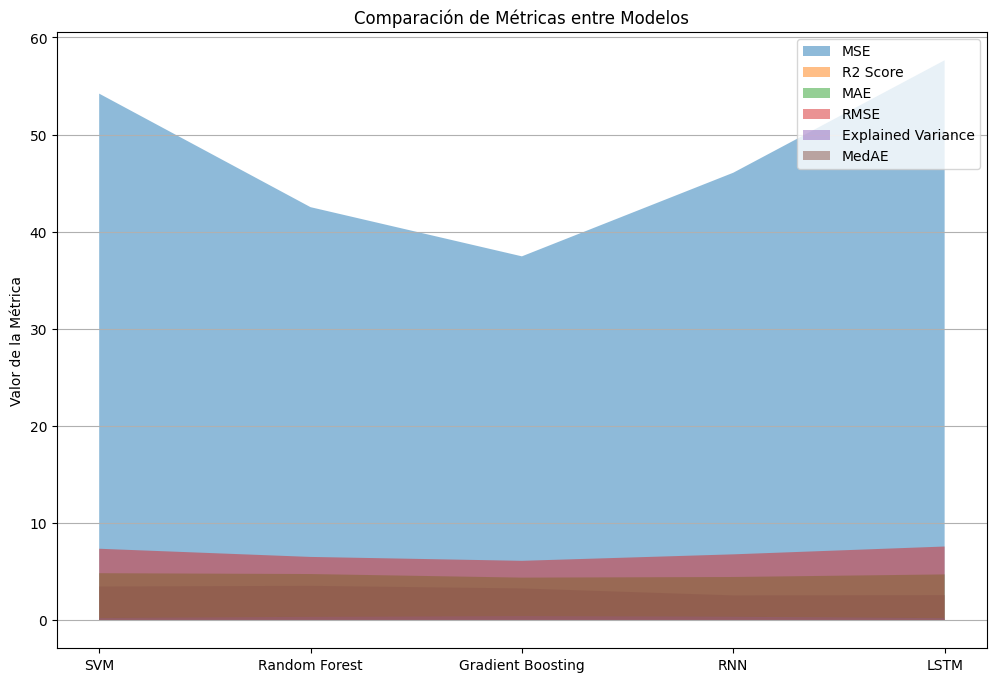

In [17]:
# Definir las métricas de cada modelo
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'RNN', 'LSTM']
mse_values = [svm_mse, rf_mse, gb_mse, rnn_mse, lstm_mse]
r2_values = [svm_r2, rf_r2, gb_r2, rnn_r2, lstm_r2]
mae_values = [svm_mae, rf_mae, gb_mae, rnn_mae, lstm_mae]
rmse_values = [svm_rmse, rf_rmse, gb_rmse, rnn_rmse, lstm_rmse]
explained_variance_values = [svm_explained_variance, rf_explained_variance, gb_explained_variance, rnn_explained_variance, lstm_explained_variance]
medae_values = [svm_medae, rf_medae, gb_medae, rnn_medae, lstm_medae]

# Crear un gráfico de polígonos
fig, ax = plt.subplots(figsize=(12, 8))

# Dibujar polígonos para cada métrica
ax.fill_between(model_names, mse_values, alpha=0.5, label='MSE')
ax.fill_between(model_names, r2_values, alpha=0.5, label='R2 Score')
ax.fill_between(model_names, mae_values, alpha=0.5, label='MAE')
ax.fill_between(model_names, rmse_values, alpha=0.5, label='RMSE')
ax.fill_between(model_names, explained_variance_values, alpha=0.5, label='Explained Variance')
ax.fill_between(model_names, medae_values, alpha=0.5, label='MedAE')

# Configuraciones adicionales
ax.set_title('Comparación de Métricas entre Modelos')
ax.legend(loc='upper right')
ax.set_ylabel('Valor de la Métrica')
ax.grid(axis='y')

# Mostrar el gráfico
plt.show()

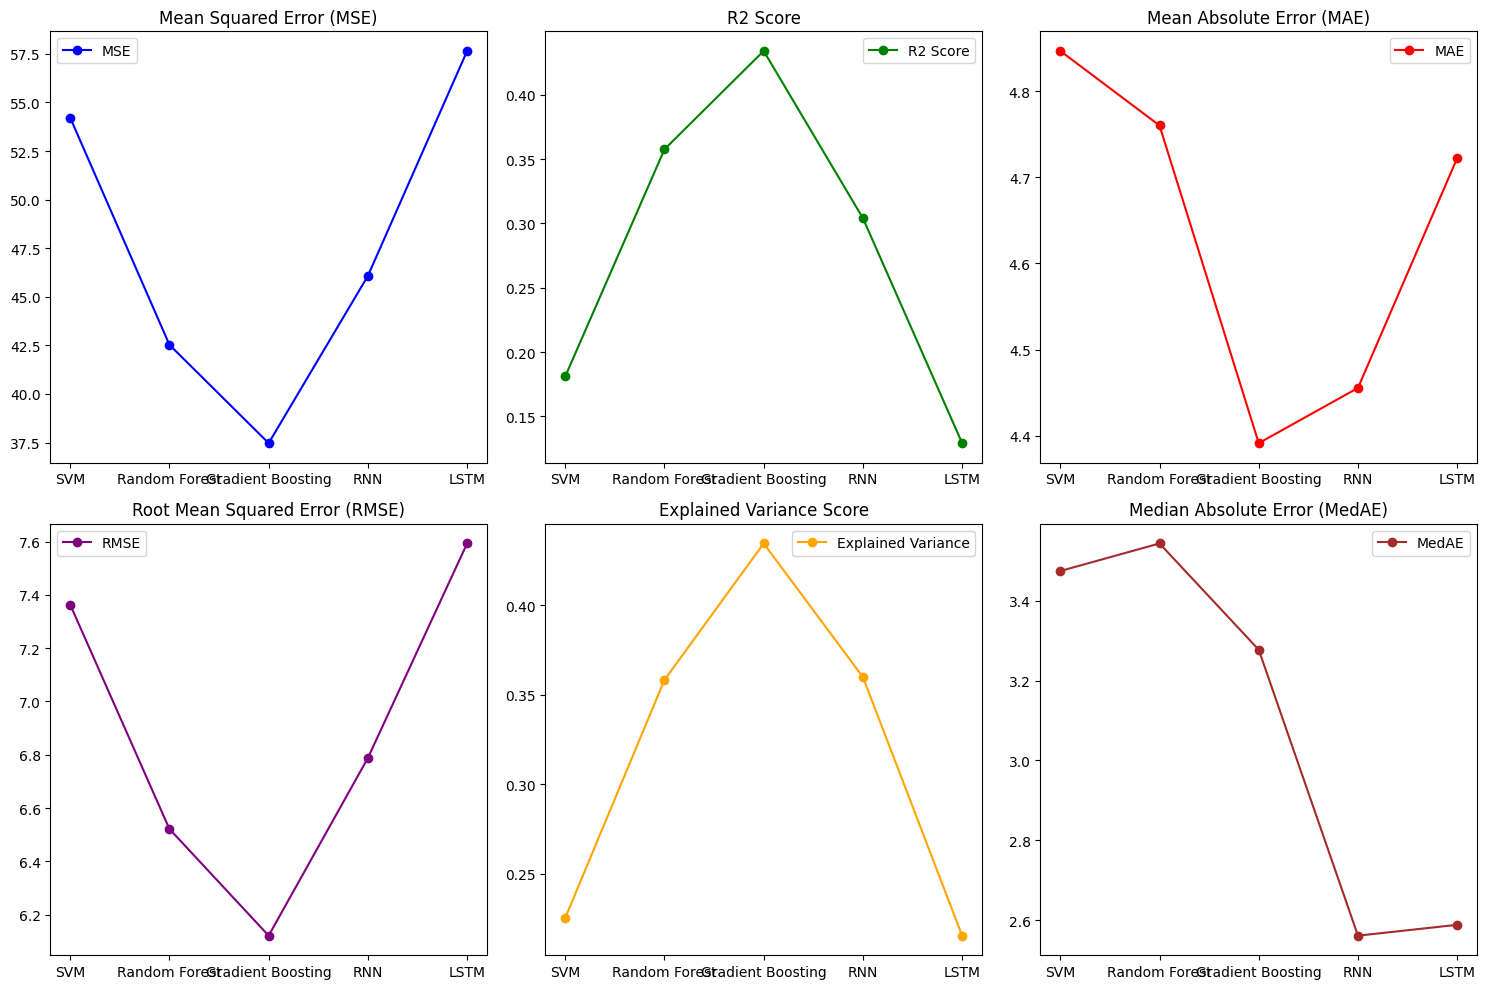

In [18]:
# Definir las métricas de cada modelo
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'RNN', 'LSTM']
mse_values = [svm_mse, rf_mse, gb_mse, rnn_mse, lstm_mse]
r2_values = [svm_r2, rf_r2, gb_r2, rnn_r2, lstm_r2]
mae_values = [svm_mae, rf_mae, gb_mae, rnn_mae, lstm_mae]
rmse_values = [svm_rmse, rf_rmse, gb_rmse, rnn_rmse, lstm_rmse]
explained_variance_values = [svm_explained_variance, rf_explained_variance, gb_explained_variance, rnn_explained_variance, lstm_explained_variance]
medae_values = [svm_medae, rf_medae, gb_medae, rnn_medae, lstm_medae]

# Crear subplots para cada métrica
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# MSE
axes[0, 0].plot(model_names, mse_values, marker='o', label='MSE', color='blue')
axes[0, 0].set_title('Mean Squared Error (MSE)')

# R2 Score
axes[0, 1].plot(model_names, r2_values, marker='o', label='R2 Score', color='green')
axes[0, 1].set_title('R2 Score')

# MAE
axes[0, 2].plot(model_names, mae_values, marker='o', label='MAE', color='red')
axes[0, 2].set_title('Mean Absolute Error (MAE)')

# RMSE
axes[1, 0].plot(model_names, rmse_values, marker='o', label='RMSE', color='purple')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# Explained Variance Score
axes[1, 1].plot(model_names, explained_variance_values, marker='o', label='Explained Variance', color='orange')
axes[1, 1].set_title('Explained Variance Score')

# Median Absolute Error
axes[1, 2].plot(model_names, medae_values, marker='o', label='MedAE', color='brown')
axes[1, 2].set_title('Median Absolute Error (MedAE)')

# Ajustar diseño y mostrar el gráfico
for ax in axes.flatten():
    ax.legend()
plt.tight_layout()
plt.show()

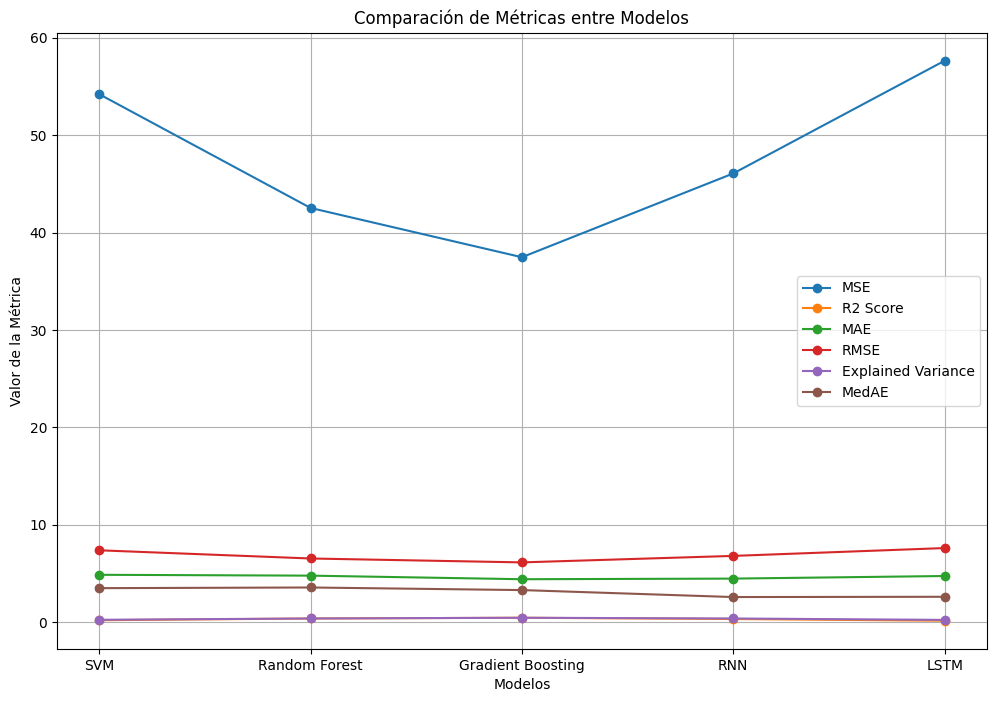

In [19]:

# Definir las métricas de cada modelo
model_names = ['SVM', 'Random Forest', 'Gradient Boosting', 'RNN', 'LSTM']
mse_values = [svm_mse, rf_mse, gb_mse, rnn_mse, lstm_mse]
r2_values = [svm_r2, rf_r2, gb_r2, rnn_r2, lstm_r2]
mae_values = [svm_mae, rf_mae, gb_mae, rnn_mae, lstm_mae]
rmse_values = [svm_rmse, rf_rmse, gb_rmse, rnn_rmse, lstm_rmse]
explained_variance_values = [svm_explained_variance, rf_explained_variance, gb_explained_variance, rnn_explained_variance, lstm_explained_variance]
medae_values = [svm_medae, rf_medae, gb_medae, rnn_medae, lstm_medae]

# Crear un solo gráfico con polígonos de líneas
plt.figure(figsize=(12, 8))

# MSE
plt.plot(model_names, mse_values, label='MSE', marker='o')
# R2 Score
plt.plot(model_names, r2_values, label='R2 Score', marker='o')
# MAE
plt.plot(model_names, mae_values, label='MAE', marker='o')
# RMSE
plt.plot(model_names, rmse_values, label='RMSE', marker='o')
# Explained Variance Score
plt.plot(model_names, explained_variance_values, label='Explained Variance', marker='o')
# Median Absolute Error
plt.plot(model_names, medae_values, label='MedAE', marker='o')

# Ajustes de estilo y leyenda
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Valor de la Métrica')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()